06.05.2024 <br>

trying to change 05_01 so that it does not form weird helix

In [5]:
seq='GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
target=[
    '((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
    '...............(((.............................................................))).....',
    '.........................................((((......................................))))'
]

simRNA_ss = r'((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]'

In [6]:
print(seq)
print(simRNA_ss)

GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]


In [7]:
import infrared as ir
import infrared.rna as rna
import RNA

In [8]:
fc = RNA.fold_compound(seq)
fc.pf()
(ss, mfe) = fc.mfe()
ss,mfe

('((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
 -32.20000076293945)

In [9]:
print(ss)
print(target[0])

((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................
((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................


In [10]:
print(seq)
print(simRNA_ss)
print('0123456789' * 8)

GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]
01234567890123456789012345678901234567890123456789012345678901234567890123456789


In [11]:
wrong_bp = [(25, 74), (26, 73)]
print(simRNA_ss[wrong_bp[0][0]], seq[wrong_bp[0][0]], simRNA_ss[wrong_bp[0][1]], seq[wrong_bp[0][1]])
print(simRNA_ss[wrong_bp[1][0]], seq[wrong_bp[1][0]], simRNA_ss[wrong_bp[1][1]], seq[wrong_bp[1][1]])

{ A } U
{ U } A


change U 26 to A? 
(maybe also change 24 to A?)
and change 74 to A? but then we have a long A ring, maybe change to C or G?

In [12]:
new_seq = list(seq)
new_seq[26] = 'A'
new_seq[74] = 'C'
new_seq = ''.join(new_seq)
print(new_seq)
print(simRNA_ss)
print('0123456789' * 8)

GAACGUAUCCGGGCAGCACUACGGUAAACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAACAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]
01234567890123456789012345678901234567890123456789012345678901234567890123456789


In [13]:
fc = RNA.fold_compound(new_seq)
fc.pf()
freq = fc.pr_structure(ss)
(ss, mfe) = fc.mfe()
print(freq, ss, mfe)

0.910880413999894 ((((((((((((......(((((.....))))).(((((........))))).))))))))))))...................... -32.20000076293945


target frequency is lower, maybe change both to A?

In [14]:
new_seq = list(seq)
new_seq[26] = 'A'
new_seq[74] = 'A'
new_seq = ''.join(new_seq)
print(new_seq)
print(simRNA_ss)
print('0123456789' * 8)
fc = RNA.fold_compound(new_seq)
fc.pf()
freq = fc.pr_structure(ss)
(ss, mfe) = fc.mfe()
print(freq, ss, mfe)

GAACGUAUCCGGGCAGCACUACGGUAAACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAAAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]
01234567890123456789012345678901234567890123456789012345678901234567890123456789
0.935616159452634 ((((((((((((......(((((.....))))).(((((........))))).))))))))))))...................... -32.20000076293945


target frequency higher, but we have long A tail --> still gonna try simRNA simulation

In [15]:
print(simRNA_ss[wrong_bp[0][0]], new_seq[wrong_bp[0][0]], simRNA_ss[wrong_bp[0][1]], new_seq[wrong_bp[0][1]])
print(simRNA_ss[wrong_bp[1][0]], new_seq[wrong_bp[1][0]], simRNA_ss[wrong_bp[1][1]], new_seq[wrong_bp[1][1]])

{ A } A
{ A } A


check energy within the TBFV family

In [16]:
import os
import re
import pandas as pd

/tmp/ipykernel_3880779/1014947811.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [17]:
def read_stockholm(file_name):
    with open(file_name, "r") as f:
        file_data = f.read()
    
    file_data = file_data.split("\n")
    seq = [line.split(" ") for line in file_data if re.match("#=GC RF ",line)]
    seq = [[e for e in line if e] for line in seq][0][-1]
    ss = [line.split(" ") for line in file_data if re.match("#=GC SS_cons",line)]
    ss = [[e for e in line if e] for line in ss][0][-1]
    return seq, ss


In [18]:
stockholm_folder = "/scr/aldea/kgutenbrunner/data/tbfv_stk"
stockholm_files = os.listdir(stockholm_folder)
stockholm_files = [stockholm_folder + "/" + file for file in stockholm_files]

In [19]:
data_for_df = []
names = []
for id, file in enumerate(stockholm_files):
    name = file[39:50]
    if name[-1] == ".":
        name = name[:-1]
    names.append(names)
    if '1' in name:
        xrRNA = 1
    else:
        xrRNA = 2
    seq, ss = read_stockholm(file)
    fc = RNA.fold_compound(seq)
    # fc.pf()
    energy = fc.eval_structure(ss)
    (ss, mfe) = fc.mfe()
    data_for_df.append([name, energy, mfe])

df_stats = pd.DataFrame(data_for_df, columns=['name', 'e', 'mfe'])
print(df_stats)


           name          e        mfe
0   ALKV_xrRNA1 -27.100000 -29.799999
1    DTV_xrRNA1 -18.299999 -30.100000
2    DTV_xrRNA2 -22.700001 -26.000000
3    GGV_xrRNA1  -9.200000 -19.100000
4    GGV_xrRNA2 -16.900000 -17.500000
5   KFDV_xrRNA1 -27.500000 -30.900000
6   KSIV_xrRNA1 -19.100000 -25.000000
7   KSIV_xrRNA2 -25.299999 -25.299999
8   LGTV_xrRNA1 -23.000000 -27.799999
9   LGTV_xrRNA2 -34.099998 -37.099998
10   LIV_xrRNA1 -22.500000 -24.200001
11   LIV_xrRNA2 -32.400002 -32.400002
12  MPFV_xrRNA1  11.400000  -5.440000
13  NEGV_xrRNA1 -29.200001 -30.700001
14  NEGV_xrRNA2 -36.200001 -36.200001
15  OHFV_xrRNA1 -20.900000 -21.799999
16  OHFV_xrRNA2 -28.600000 -31.200001
17  POWV_xrRNA1 -13.400000 -21.799999
18  POWV_xrRNA2 -23.799999 -28.000000
19  SGEV_xrRNA1 -24.500000 -31.600000
20  SGEV_xrRNA2 -30.900000 -31.600000
21  SREV_xrRNA1 -19.500000 -27.500000
22  TBEV_xrRNA1 -22.900000 -25.100000
23  TBEV_xrRNA2 -14.900000 -19.000000
24  TYUV_xrRNA1 -26.600000 -29.600000
25  XiFV_xrR

07.05 <br>
edited version of 05_01 did not work. structure is worse than before

In [20]:
seq='GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
target=[
    '((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
    '...............(((.............................................................))).....',
    '.........................................((((......................................))))'
]

simRNA_ss = r'((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]'

In [21]:
print(seq)
print(simRNA_ss)

GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]


In [22]:
import infrared as ir
import infrared.rna as rna
import RNA

In [23]:
fc = RNA.fold_compound(seq)
fc.pf()
ss= target[0]
freq = fc.pr_structure(ss)
(ss, mfe) = fc.mfe()
print(freq, ss,mfe)

0.9323652181068282 ((((((((((((......(((((.....))))).(((((........))))).))))))))))))...................... -32.20000076293945


In [24]:
print(seq)
print(simRNA_ss)
print('0123456789' * 8)

GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]
01234567890123456789012345678901234567890123456789012345678901234567890123456789


In [25]:
wrong_bp = [(25, 74), (26, 73)]
print(simRNA_ss[wrong_bp[0][0]], seq[wrong_bp[0][0]], simRNA_ss[wrong_bp[0][1]], seq[wrong_bp[0][1]])
print(simRNA_ss[wrong_bp[1][0]], seq[wrong_bp[1][0]], simRNA_ss[wrong_bp[1][1]], seq[wrong_bp[1][1]])

{ A } U
{ U } A


changing U 26 to A and 74 to A did not work
change it to different nt? 
change 26 to C, and 74 and 75 to U.

In [26]:
new_seq = list(seq)
new_seq[25] = 'C'
# new_seq[26] = 'C'
new_seq[73] = 'U'
new_seq[74] = 'U'
new_seq = ''.join(new_seq)
print(new_seq)
print(simRNA_ss)
print('0123456789' * 8)

GAACGUAUCCGGGCAGCACUACGGUCUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAUUAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))........}}....}}}.]]]]
01234567890123456789012345678901234567890123456789012345678901234567890123456789


In [27]:
fc = RNA.fold_compound(new_seq)
fc.pf()
freq = fc.pr_structure(ss)
(ss, mfe) = fc.mfe()
print(freq, ss, mfe)

0.9204492729163527 ((((((((((((......(((((.....))))).(((((........))))).))))))))))))...................... -32.20000076293945


In [28]:

# new_seq[25] = 'C'
# new_seq[26] = 'C'
new_seq = seq[:71] + seq[75:]

new_simRNA_ss = simRNA_ss[:71] + simRNA_ss[75:]
new_ss = target[0][:71] + target[0][75:]

print(seq)
print(new_seq)
print(new_simRNA_ss)
print(new_ss)
print(target[1][:71] + target[1][75:])
print(target[2][:71] + target[2][75:])

# new_seq = 'GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAUAACGUCGACC'

GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAUAAUGCCGACC
((((((((((((...{{{(((((..{{.))))).(((((..[[[[..))))).))))))))))))..........}}}.]]]]
((((((((((((......(((((.....))))).(((((........))))).))))))))))))..................
...............(((.........................................................))).....
.........................................((((..................................))))


In [29]:
fc = RNA.fold_compound(new_seq)
fc.pf()
freq = fc.pr_structure(new_ss)
(ss, mfe) = fc.mfe()
print(freq, ss, mfe)

0.9369613189749991 ((((((((((((......(((((.....))))).(((((........))))).)))))))))))).................. -32.20000076293945


### comparing simulations

04_30, 05_03, 05_04 are all pretty similiar from their structure, let's compare this sequences. <br>
only 05_01 has a 'good' structure  <br>
05_02 also does some weird shit <br>

In [30]:
def structures_to_db(structures):
    output = ''
    first = structures[0]
    second = structures[1].replace('(', '[').replace(')', ']')
    third = structures[2].replace('(', '{').replace(')', '}')
    for i in range(len(first)):
        if second[i]=='.' and third[i]=='.':
            output += first[i]
        else:
            if third[i]=='.':
                output += second[i]
            else:
                output += third[i]
    return output


In [31]:
structures_to_db([
    '((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
    '...............(((.............................................................))).....',
'.........................................((((......................................))))'])

'((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}'

In [32]:
seq_04_30 = 'GCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAAUGCGACC'
seq_05_03 = 'GCCCGAGUGGAGGCAGCACCGCAAUUGAACGCGGACCCCCAAUGGUCAGGGGGACUCCAUUUGGGCAAAAAAUUAAAAUGCUCGACC'
seq_05_04 = 'GCCAGAGGCCUGGCAGCACCGGGAAAUCGCCCGGACCCCGCUAGGUCGCGGGGACAGGCCUCUGGCGAAAAAAAAAAAAUGCGGACC'

ss_04_30 = r'((((((((((((...[[[((((........)))).((((((..{{{{..)))))).))))))))))))............]]]}}}}'
ss_05_03 = r'((((((((((((...[[[((((........)))).(((((...{{{{.))))).))))))))))))............]]]..}}}}'
ss_05_04 = r'((((((((((((...[[[(((((......))))).((((((..{{{{)))))).)))))))))))).............]]].}}}}'

seq_05_01 = 'GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
ss_05_01 = r'((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}'

print(seq_04_30)
print(seq_05_03)
print(seq_05_04)
print(seq_05_01)
print(ss_04_30)
print(ss_05_03)
print(ss_05_04)
print(ss_05_01)

GCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAAUGCGACC
GCCCGAGUGGAGGCAGCACCGCAAUUGAACGCGGACCCCCAAUGGUCAGGGGGACUCCAUUUGGGCAAAAAAUUAAAAUGCUCGACC
GCCAGAGGCCUGGCAGCACCGGGAAAUCGCCCGGACCCCGCUAGGUCGCGGGGACAGGCCUCUGGCGAAAAAAAAAAAAUGCGGACC
GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC
((((((((((((...[[[((((........)))).((((((..{{{{..)))))).))))))))))))............]]]}}}}
((((((((((((...[[[((((........)))).(((((...{{{{.))))).))))))))))))............]]]..}}}}
((((((((((((...[[[(((((......))))).((((((..{{{{)))))).)))))))))))).............]]].}}}}
((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}


In [33]:


GAACGUAUCCGXXXXXXAXUACGGUAUACGUAXXXCCUGAAXXXXAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAXXXCXXXX
GCGACCGGUCAXXXXXXAXCGGGAUUAAAACCGXXXCGGGCGAXXXXGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAA-XXX--XXXX
GCCCGAGUGGAXXXXXXAXCGCAAUUGAACGCGXXXCCCCAAUXXXXA--GGGGGACUCCAUUUGGGCAAAAAAUUAAAA-XXXUCXXXX
GCCAGAGGCCUXXXXXXAXCGGGAAAUCGCCCGXXXCCCGCUAXXXX--GCGGGGACAGGCCUCUGGCGAAAAAAAAAAAAXXXG-XXXX
((((((((((((...[[[((((........)))).((((((..{{{{..)))))).))))))))))))............-]]]--}}}}
((((((((((((...[[[((((........)))).(((((...{{{{.--))))).))))))))))))............-]]]..}}}}
((((((((((((...[[[(((((......))))).((((((..{{{{--)))))).)))))))))))).............]]].-}}}}


SyntaxError: invalid syntax (2114446577.py, line 5)

Text(0, 0.5, 'Counts')

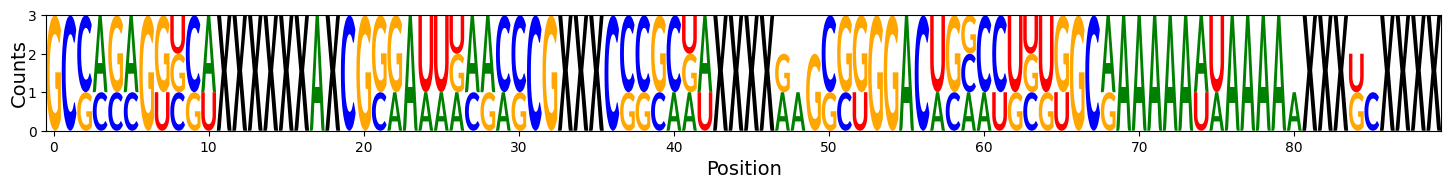

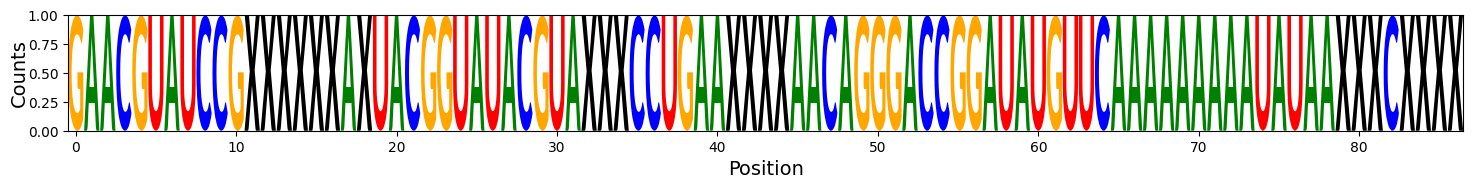

In [ ]:
#Creating Counts Sequence Logo

import logomaker
from Bio import AlignIO

alignment = AlignIO.read('/scr/aldea/kgutenbrunner/working/analysis/seq_analysis/align_bad.aln', "fasta")

sequences = [str(record.seq) for record in alignment]
alignment_df = logomaker.alignment_to_matrix(sequences)

logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme="classic")

logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

#Creating Counts Sequence Logo

import logomaker
from Bio import AlignIO

alignment = AlignIO.read('/scr/aldea/kgutenbrunner/working/analysis/seq_analysis/align_good.aln', "fasta")

sequences = [str(record.seq) for record in alignment]
alignment_df = logomaker.alignment_to_matrix(sequences)

logo = logomaker.Logo(alignment_df, figsize=(18,1.5), font_name='Carlito', color_scheme="classic")

logo.ax.set_xlabel('Position',fontsize=14)
logo.ax.set_ylabel("Counts", labelpad=-1,fontsize=14)

structure talk

In [ ]:
import varnaapi

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU', '-structureDBN', '..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..', '-o', '/tmp/tmph9ofx7_i.png', '-bp', '#006400', '-resolution', '2.0', '-bpStyle', 'simple']


Output file: /tmp/tmph9ofx7_i.png



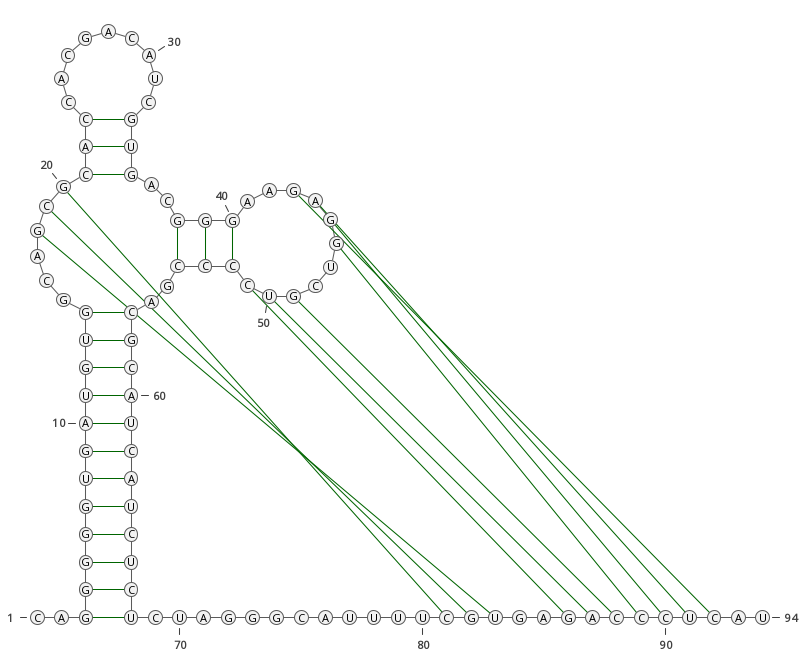

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU', '-structureDBN', '..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..', '-o', '/scr/aldea/kgutenbrunner/working/xrRNA_design/analysis/DTVDTV_ss.png', '-bp', '#006400', '-resolution', '2.0', '-bpStyle', 'simple']


Output file: /scr/aldea/kgutenbrunner/working/xrRNA_design/analysis/DTVDTV_ss.png



In [ ]:
from varnaapi import Structure
seq = 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU'
ss =  '..((((((((((((...[[[(((.........)))..(((..{{{{..{{{)))..))))))))))))............]]]..}}}}}}}..'
v = varnaapi.Structure(sequence=seq, structure=ss)
v.update(bpStyle='simple', drawBackbone=True, bp='#006400', fillBases=True, spaceBetweenBases=1, resolution=2)


v.show()
v.savefig('/scr/aldea/kgutenbrunner/working/xrRNA_design/analysis/DTVDTV_ss.png')

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '               GGCAGCRC             GAC      GGUC      GAC                         YGU GACC', '-structureDBN', '....((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}', '-o', '/tmp/tmpozp3onea.png', '-bp', '#006400', '-resolution', '2.0', '-bpStyle', 'simple', '-highlightRegion', '5-16:radius=10.0,fill=#ffc09c,outline=#ffc09c;58-69:radius=10.0,fill=#ffc09c,outline=#ffc09c;23-27:radius=10.0,fill=#8ae6ff,outline=#8ae6ff;33-37:radius=10.0,fill=#8ae6ff,outline=#8ae6ff;27-33:radius=10.0,fill=#d1fffa,outline=#d1fffa;39-43:radius=10.0,fill=#9fff8a,outline=#9fff8a;52-56:radius=10.0,fill=#9fff8a,outline=#9fff8a;43-52:radius=10.0,fill=#cbfcc0,outline=#cbfcc0;16-23:radius=10.0,fill=#e77df5,outline=#e77df5;37-39:radius=10.0,fill=#e77df5,outline=#e77df5;56-58:radius=10.0,fill=#e77df5,outline=#e77df5;16-23:radius=10.0,fill=#e77df5,outl

Output file: /tmp/tmpozp3onea.png



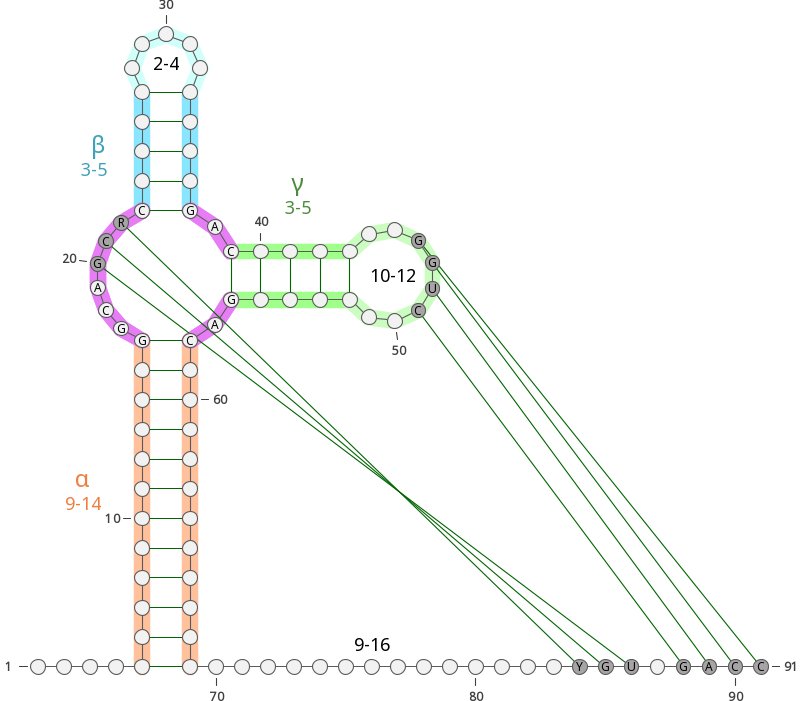

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '               GGCAGCRC             GAC      GGUC      GAC                         YGU GACC', '-structureDBN', '....((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}', '-o', '/scr/aldea/kgutenbrunner/working/cons_ss.png', '-bp', '#006400', '-resolution', '2.0', '-bpStyle', 'simple', '-highlightRegion', '5-16:radius=10.0,fill=#ffc09c,outline=#ffc09c;58-69:radius=10.0,fill=#ffc09c,outline=#ffc09c;23-27:radius=10.0,fill=#8ae6ff,outline=#8ae6ff;33-37:radius=10.0,fill=#8ae6ff,outline=#8ae6ff;27-33:radius=10.0,fill=#d1fffa,outline=#d1fffa;39-43:radius=10.0,fill=#9fff8a,outline=#9fff8a;52-56:radius=10.0,fill=#9fff8a,outline=#9fff8a;43-52:radius=10.0,fill=#cbfcc0,outline=#cbfcc0;16-23:radius=10.0,fill=#e77df5,outline=#e77df5;37-39:radius=10.0,fill=#e77df5,outline=#e77df5;56-58:radius=10.0,fill=#e77df5,outline=#e77df5;16-23:radiu

Output file: /scr/aldea/kgutenbrunner/working/cons_ss.png



In [ ]:

pk = varnaapi.param.BasesStyle(fill="#a6a4a4")
v.add_bases_style(pk, [*range(84, 87), *range(20,23), *range(88, 92), *range(46,50)])
v.update(bpStyle='simple', drawBackbone=True, bp='#006400', fillBases=True, spaceBetweenBases=1, resolution=2)

v.show()
v.savefig('/scr/aldea/kgutenbrunner/working/cons_ss.png')

In [ ]:
v.savefig('/scr/aldea/kgutenbrunner/working/cons_ss.png')

['java', '-cp', '/home/mescalin/skibinski/Downloads/VARNAv3-93.jar', 'fr.orsay.lri.varna.applications.VARNAcmd', '-sequenceDBN', '               GGCAGCRC             GAC      GGUC      GAC                         YGU GUCC', '-structureDBN', '....((((((((((((...[[[(((((.....))))).(((((..{{{{..))))).))))))))))))..............]]].}}}}', '-o', '/scr/aldea/kgutenbrunner/working/cons_ss.png', '-bp', '#006400', '-bpStyle', 'simple', '-highlightRegion', '5-16:radius=10.0,fill=#ffc09c;58-69:radius=10.0,fill=#ffc09c;23-27:radius=10.0,fill=#8ae6ff;33-37:radius=10.0,fill=#8ae6ff;27-33:radius=10.0,fill=#d1fffa;39-43:radius=10.0,fill=#9fff8a;52-56:radius=10.0,fill=#9fff8a;43-52:radius=10.0,fill=#cbfcc0;16-23:radius=10.0,fill=#e77df5;37-39:radius=10.0,fill=#e77df5;56-58:radius=10.0,fill=#e77df5;16-23:radius=10.0,fill=#e77df5;37-39:radius=10.0,fill=#e77df5;56-58:radius=10.0,fill=#e77df5;84-86:radius=10.0,fill=#ff878d;88-91:radius=10.0,fill=#ff878d', '-basesStyle1', 'fill=#ff878d', '-applyBasesStyle1on

Output file: /scr/aldea/kgutenbrunner/working/cons_ss.png



## 05.2024 - adjusting sequences

In [ ]:
import RNA

In [ ]:
# DTV sequence + ss
seq = 'CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCGACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU'
ss = '..((((((((((((......(((.........))).((((...........)))).))))))))))))..........................'

fc = RNA.fold_compound(seq.replace('-',''))
fc.pf()
fc.pr_structure(ss)

1.0259597086704044e-08

very low frequency, so frequency is not the only indicator

In [ ]:
RNA.fold('CAGGGGGUGAUGUGGCAGCGCACCACGACAUCGUGACGGGAAGAGGUCGUCCCCSACGCAUCAUCUCUCUAGGGCAUUUUCGUGAGACCCUCAU')

['..((((((((((((((...))..((((....))))..((((........))))...))))))))))))..((((..((.....))..))))...',
 -29.299999237060547]

### 04_30
added nt infront, change a C to a U in the polyC, but also deleted some Cs, and also added some nt in the end. 

In [ ]:
seq =   'CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCCCCUGCGACCCUC'
ss = [  '.((((((((((((......((((........)))).((((((........)))))).))))))))))))....................',
        '................(((............................................................))).......',
        '............................................((((..................................))))...']


In [ ]:
for i in range(69, 79):
    new_seq = list(seq)
    new_seq[i] = 'U'
    new_seq = ''.join(new_seq)
    fc = RNA.fold_compound(new_seq.replace('-',''))
    fc.pf()
    print(new_seq)
    print(fc.pr_structure(ss[0]))

CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCUCCCCCCCCCUGCGACCCUC
0.8490553674449741
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCUCCCCCCCCUGCGACCCUC
0.8383130816216733
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCUCCCCCCCUGCGACCCUC
0.8369274888488488
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCUCCCCCCUGCGACCCUC
0.7816346092429353
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCUCCCCCUGCGACCCUC
0.8317833495686178
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCUCCCCUGCGACCCUC
0.7794815068198173
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCUCCCUGCGACCCUC
0.8207186660142979
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCUCCUGCGACCCUC
0.8035558457868016
CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCCCUCUGCGACCCUC
0.8610292741257691
CGCGACCGGUCAGGCAGCA

In [ ]:
seq_04_30_edited = 'CGCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCCCCCCCUCCCUGCGACCCUC'

delete beta structure of 04_30 <br>

In [44]:
og_seq =    'GCGACCGGUCAGGCAGCACCGGGAUUAAAACCGGACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAAUGCGACC'
og_ss =     ['((((((((((((......((((........)))).((((((........)))))).))))))))))))...................'
             '...............(((..............................................................)))....'
             '...........................................((((....................................))))']

new_seq =     'GCGACCGGUCAGGCAGCAGAAAACCGGGCGAGGUCGAGCCUGGACUGACCGGUUGCAAAAAAAUAAAAUUUGUGACC'
new_ss =     ['((((((((((((...........((((((........)))))).)))))))))))).....................',
             '...............(((((................................................)))))....',
             '...............................((((......................................))))']

for i in new_ss:
    print(i)

((((((((((((...........((((((........)))))).)))))))))))).....................
...............(((((................................................)))))....
...............................((((......................................))))


In [42]:
fc = RNA.fold_compound(new_seq)
fc.pf()

print(fc.pr_structure(new_ss[0]))

0.6461550812992468


## 05_01
change end of 05_01 to C instead of As

In [ ]:
seq = 'CGAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCCCCCCCCCCUAUAAUGCCGACC'
ss = ['.((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
      '................(((.............................................................))).....',
      '..........................................((((......................................))))']

In [ ]:
fc = RNA.fold_compound(seq.replace('-',''))
fc.pf()
print(fc.pr_structure(ss[0]))

0.8955871925918893


delete beta structure of 05_01 for 05_01_no_beta_0

In [ ]:
og_seq = 'GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
og_ss = ['((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
'...............(((.............................................................))).....',
'.........................................((((......................................))))']
new_seq =   'GAACGUAUCCGGGCAGCAACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
new_ss = [  '((((((((((((.......(((((........))))).))))))))))))......................',
            '...............(((..............................................))).....',
            '..........................((((......................................))))']


In [ ]:
fc = RNA.fold_compound(new_seq)
fc.pf()

print(fc.pr_structure(new_ss[0]))

0.9132173556831026


delete beta structure of 05_01 for 05_01_no_beta_1 <br>
in 05_01_no_beta_0 i simply deleted stem beta <br>
now i am changing it to fit the TBFV which have no beta stem

In [37]:
og_seq = 'GAACGUAUCCGGGCAGCACUACGGUAUACGUAGACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUAAUGCCGACC'
og_ss = ['((((((((((((......(((((.....))))).(((((........))))).))))))))))))......................',
'...............(((.............................................................))).....',
'.........................................((((......................................))))']

new_seq =    'GAACGUAUCCGGGCAGCAGAAACCCUGAAGGUCAACAGGGACCGGAUAUGUUCAAAAAAAAAUAUUUUGCCGACC'
new_ss =    ['((((((((((((..........(((((........))))).))))))))))))......................',
            '...............(((((.............................................))))).....',
            '.............................((((......................................))))']


In [38]:
fc = RNA.fold_compound(new_seq)
fc.pf()

print(fc.pr_structure(new_ss[0]))

0.5978160882363438


In [43]:
for i in new_ss:
    print(i)

((((((((((((...........((((((........)))))).)))))))))))).....................
...............(((((................................................)))))....
...............................((((......................................))))


# top 10 design

In [135]:
# true if working from tbi, false is working from home
tbi = True

if tbi:
    base_folder = '/scr/aldea/kgutenbrunner/working'
else:
    base_folder = '/Users/katringutenbrunner/Desktop/MA/working'

In [136]:
import pandas as pd
import os
import numpy as np

In [137]:
structures = ['..(((((((..(((((((......(((((.........))))).(((((((.............))))))).)))))))..))))))).........................',
		      '.....................(((...............................................................................))).......',
		      '........................................................(((((...............................................)))))']

In [138]:
sequence_folder = os.path.join(base_folder, 'xrRNA_design/TBFV_design/data/seqs/designs_analysis/')
files = [sequence_folder + i for i in os.listdir(sequence_folder) if 'design_output' in i]

In [139]:
files = sorted(files)
files.append(files.pop(1))

In [140]:
regexr_pattern = 'sequence: *(.+)\n'
sequences = {}
for file in files:
    file_name = re.search('(design_output.*)\.', file)[1]
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('sequence'):
                stripped_line = line.strip()
                sequence = re.search(regexr_pattern, line)[1]
                sequences[file_name] = sequence
                break
;

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_748311/41779359.py:4: SyntaxWarning: invalid escape sequence '\.'
  file_name = re.search('(design_output.*)\.', file)[1]


''

In [141]:
sequences

{'design_output_1': 'CCGGCGGG-UUGCAGUGGGCAGCACGC--UAACAC-----GCGACGGGAGUUU----GGUC---GCUCCCGACUACUGCC--CCCGCCAAAAAA-------UUUGUGAGACC-',
 'design_output_2': 'AAGGCCGC-CUGCCGG-GGCAGCACACC-AUUAGUC---GGUGACGGGGGGU-----GGUCU--CUUCCCGAC-UCGGCUU-GCGGCCAAAAAAUA-----UUUGUGAGACC-',
 'design_output_3': 'GAGGACGG-UUGCGG--GGCAGCACGC--GAUA-------GCGACGGGU--AAUA--GGUCC----GCCCGAC--CCGC---CCGUCCAAAAACCA-----UUUGUGAGACC-',
 'design_output_4': 'AAGGGGCC-UCCAUG--GGCAGCACGCU-GAAGACG---AGCGACGGGUUG------GGUCAG-CAGCCCGAC--CAUGCU-GGCCCCAAAAACCA-----UUUGUGAGACC-',
 'design_output_5': 'AAGCACGG-UAGGCCGCGGCAGCACACAGACC------CUGUGACGGGUG-AA----GGUCAG--CACCCGACGCGGCC---CCGUGCAAUUGAGAU----UUUGUGAGACC-',
 'design_output_6': 'AAGCCUGG-CUGCGGUGGGCAGCACGC--GAACACCGA--GCGACGGGGACUA----GGUCC--GUCCCCGACCACCGC---CCAGGCAGUAAAU------UUUGUGAGACC-',
 'design_output_7': 'AAGAGGGC-G-CCACC-GGCAGCACGC--GAAAUA-----GCGACGGGC--CAGC--GGUCA----GCCCGAC-GGUGG---GCCCUCAAGAAAA------UUUGUGAGACC-',
 'design_output_8': 'AAGGGAGC-G-CCACU-GGC

In [142]:
df_design = pd.read_csv(os.path.join(base_folder, 'thesis/data/TBFV_10_designs.csv'))

In [143]:
def get_design(df, design, cluster, to_get='seq'):
    index = df[(df['design'] == design) & (df['cluster'] == cluster)].index[0]
    return df.iloc[index]


## changing design 09 for simRNA


In [144]:
design9 = get_design(df_design, 9, 1, to_get='seq')

In [157]:
seq = design9['seq']
ss = design9['ss']
print(seq)
print(ss)
print('1234567890'*9)
print('0000000001'*9)

CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC
..((((((.((((((.{.[[[(((.[[[[...))).(((((}.{{{{{...))))).))))))..)))))).]]]]......]]]..}}}}}
123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
000000000100000000010000000001000000000100000000010000000001000000000100000000010000000001


In [158]:
import RNA

In [215]:
def get_mfe(seq):
    fc = RNA.fold_compound(seq.replace('-',''))
    fc.pf()
    return fc.mfe()


def target_frequency(sequence, structure):
    ss = remove_positioned_gaps(sequence, structure)
    fc = RNA.fold_compound(sequence.replace('-',''))
    fc.pf()
    return fc.pr_structure(ss)


In [155]:
seq_9 = sequences['design_output_9']
for i in structures:
    print(remove_positioned_gaps(seq_9, i))
print(seq_9.replace('-', ''))
print('1234567890'*9)
print('0000000001'*9)

..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
..................(((.............................................................))).......
...........................................(((((.......................................)))))
CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC
123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
000000000100000000010000000001000000000100000000010000000001000000000100000000010000000001


In [168]:
print(remove_positioned_gaps(seq_9, structures[0]))
print(get_mfe(seq_9)[0])

..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................


In [214]:
# bp between 
    #      000000000100000000010000000001000000000100000000010000000001000000000100000000010000000001
          #123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890  
          #..((((((.((((((.{.[[[(((.[[[[...))).(((((}.{{{{{...))))).))))))..)))))).]]]]......]]]..}}}}}
old_seq = 'CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC'
new_seq = 'CCGCCCAGGGCCUAGGCAGCACGCGGACAUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAAAAGUAAUUUGUGAGACCC'
#          ..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................

target_ss = remove_positioned_gaps(seq_9, structures[0])
print(target_ss)
print(get_mfe(new_seq)[0])

print(target_frequency(old_seq, target_ss))
target_frequency(new_seq, target_ss)

..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
0.6212488455503259


0.5909633158792592

In [216]:
seq_8 = sequences['design_output_8']
for i in structures:
    print(remove_positioned_gaps(seq_8, i))
print(seq_8.replace('-', ''))
print('1234567890'*9)
print('0000000001'*9)

..((((((.((((((......((((.......)))).((((((........)))))).))))))))))))..................
..................(((.........................................................))).......
...........................................(((((...................................)))))
AAGGGAGCGCCACUGGCAGCACGCUUCAUAUUAGCGACGGGGUGGGUCCAGACCCCGACAGUGGGCUCCCAAAAAAUUUGUGAGACCC
123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
000000000100000000010000000001000000000100000000010000000001000000000100000000010000000001


In [ ]:
print(remove_positioned_gaps(seq_8, structures[0]))
print(get_mfe(seq_8)[0])

..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................


In [ ]:
# bp between 
    #      000000000100000000010000000001000000000100000000010000000001000000000100000000010000000001
          #123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890  
          #..((((((.((((((.{.[[[(((.[[[[...))).(((((}.{{{{{...))))).))))))..)))))).]]]]......]]]..}}}}}
old_seq = 'CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC'
new_seq = 'CCGCCCAGGGCCUAGGCAGCACGCGGACAUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAAAAGUAAUUUGUGAGACCC'
#          ..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................

target_ss = remove_positioned_gaps(seq_8, structures[0])
print(target_ss)
print(get_mfe(new_seq)[0])

print(target_frequency(old_seq, target_ss))
target_frequency(new_seq, target_ss)

..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................
0.6212488455503259


0.5909633158792592

## adjusting design 09
after MD analysis of design 09 changed some things

In [2]:
import RNA

In [3]:
def target_freq(seq, ss): 
    fc = RNA.fold_compound(seq)
    fc.pf()
    return fc.pr_structure(ss)

def mfe_ss(seq): 
    fc = RNA.fold_compound(seq)
    mfe, _ = fc.pf()
    return mfe

In [4]:
# old sequence of design 09
old_sequence = 'CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC'
# CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC
# 0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
# 0        10        20        30        40        50        60        70        80        90        00        10        20


In [5]:
# structure of design 09
structures = ['..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).....................',
'..................(((.............................................................))).......',
'...........................................(((((.......................................)))))',
]

In [6]:
target_freq(old_sequence, structures[0])

0.6212488455503259

CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..................... (-32.50)
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..................... [-32.79]
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..................... {-32.50 d=0.95}
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..................... {-32.50 MEA=90.30}
 frequency of mfe structure in ensemble 0.621249; ensemble diversity 1.83  


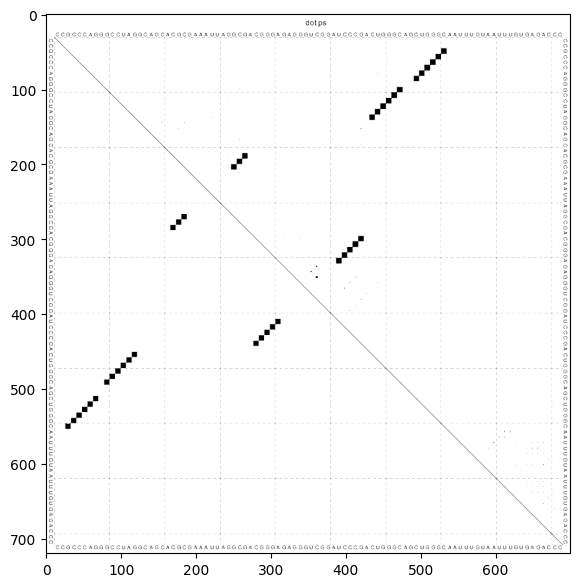

In [7]:
seq = old_sequence
!echo $seq > test.seq
!RNAfold -p --MEA < test.seq
!convert dot.ps dot.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("dot.png")
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image)

In [8]:
# change the bp AU of 14 - 59 to a GC pair for a base triple
base_triple_seq = list(old_sequence)
base_triple_seq[13] = 'G'
base_triple_seq[58] = 'C'
base_triple_seq = ''.join(base_triple_seq)


In [9]:
print(base_triple_seq)
target_freq(base_triple_seq, structures[0])

CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGUAAUUUGUGAGACCC


0.6186375071171464

In [10]:
# remove position 78 (u) from old seqeunce
remove_78_seq = old_sequence[:77] + old_sequence[78:]
new_ss = [ss[:77] + ss[78:] for ss in structures]

In [11]:
for i in new_ss:
    print(i)
print(remove_78_seq)
target_freq(remove_78_seq, new_ss[0])

..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
..................(((............................................................))).......
...........................................(((((......................................)))))
CCGCCCAGGGCCUAGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACUGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC


0.6165105383643579

In [12]:
# now remove and add base triple
bt_and_remove_78_seq = base_triple_seq[:77] + base_triple_seq[78:]
new_ss = [ss[:77] + ss[78:] for ss in structures]

In [13]:
for i in new_ss:
    print(i)
print(bt_and_remove_78_seq)
target_freq(bt_and_remove_78_seq, new_ss[0])

..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
..................(((............................................................))).......
...........................................(((((......................................)))))
CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC


0.6135856259976016

In [14]:
# create 3D simulation of all three new sequences
# only bt_and_remove_78_seq looks promising, but has unwanted base pair between pos 70 and 80
#							                		                     ++++  ----
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAUUGGACCUGUGAGACCC
# 0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
# ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))........(((.....))).
# ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
# ..................(((............................................................))).......
# ...........................................(((((......................................)))))

new_bt_and_remove_78_seq = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAAUGAACCUGUGAGACCC'

print('New new_bt_and_remove_78_seq')
print('New seq:\t', new_bt_and_remove_78_seq)
print('target ss\t', new_ss[0])
print('mfe ss\t\t',mfe_ss(new_bt_and_remove_78_seq))
print('target freq:\t', target_freq(new_bt_and_remove_78_seq, new_ss[0]))



New new_bt_and_remove_78_seq
New seq:	 CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAAUGAACCUGUGAGACCC
target ss	 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
mfe ss		 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
target freq:	 0.6244280065798367


In [15]:
# sol1 = change all nt to As
# AAAA - AAAA
# sol2 = + site just A's, - site change Us to Cs
# AAAA - AACC
# sol3 = + site changed to UAAU, - site changed to AACC
# UAAA - AACC
#							                		                           ++++  ----
og =   'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC'
sol1 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAAAUGAAAAUGUGAGACCC'
sol2 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAAAUGAACCUGUGAGACCC'
sol3 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAAUGAACCUGUGAGACCC'

CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAAUGAACCUGUGAGACCC
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).................... (-34.00)
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).................... [-34.29]
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).................... {-34.00 d=1.33}
..((((((.((((((......(((........))).(((((..........))))).))))))..)))))).................... {-34.00 MEA=88.82}
 frequency of mfe structure in ensemble 0.624428; ensemble diversity 2.56  


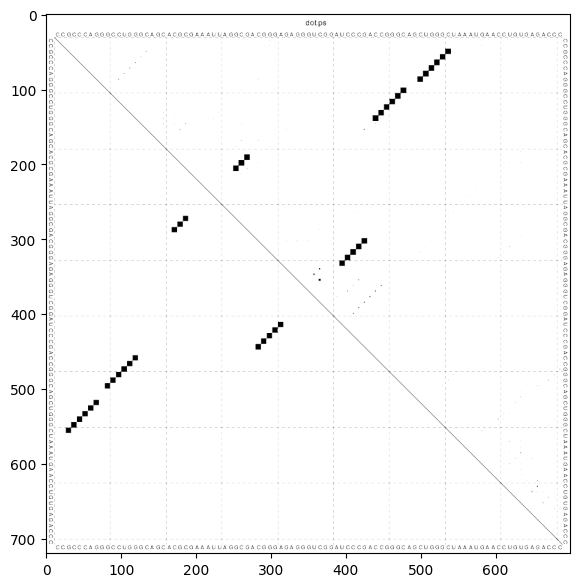

In [16]:
seq = new_bt_and_remove_78_seq
!echo $seq > test.seq
!RNAfold -p --MEA < test.seq
!convert dot.ps dot.png

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("dot.png")
fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(image)

solutions did not work, so i will try to delete some nts

# sol1 = change all nt to As
# sol2 = + site just A's, - site change Us to Cs
# sol3 = + site changed to UAAU, - site changed to AACC
#							                		                           ++++  ----
og =   'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC'
sol1 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAAAUGAAAAUGUGAGACCC'
sol2 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAAAUGAACCUGUGAGACCC'
sol3 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCUAAAUGAACCUGUGAGACCC'

In [17]:

def remove_positioned_gaps(sequence, structure):
    remove = [i for i, nt in enumerate(sequence) if nt == '-']
    new_ss = [structure[i] for i in range(len(structure)) if i not in remove]
    return ''.join(new_ss)

In [41]:
# create 3D simulation of all three new sequences
# only bt_and_remove_78_seq looks promising, but has unwanted base pair between pos 70 and 80
#							                		                     ++++  ----
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCA---UGA---UGUGAGACCC
# 0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
# ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
# ..................(((............................................................))).......
# ...........................................(((((......................................)))))

sol_4 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCA---UGA---UGUGAGACCC'

new_target_ss = [remove_positioned_gaps(sol_4, ss) for ss in new_ss]
sol_4 = sol_4.replace('-', '')
print('New seq:\t', sol_4)
print('target ss\t', new_target_ss[0])
print('mfe ss\t\t',mfe_ss(sol_4))
print('target freq:\t', round(target_freq(sol_4, new_target_ss[0]), 3))

for i in new_target_ss:
    print(i)
print(len(sol_4))

New seq:	 CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAUGAUGUGAGACCC
target ss	 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..............
mfe ss		 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..............
target freq:	 0.65
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))..............
..................(((......................................................))).......
...........................................(((((................................)))))
85


In [42]:
# create 3D simulation of all three new sequences
# only bt_and_remove_78_seq looks promising, but has unwanted base pair between pos 70 and 80
#							                		                     ++++  ----
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUUUGAAUUUGUGAGACCC
# CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAA--UGAA--UGUGAGACCC
# 0123456789012345678901234567890123456789012345678901234567890123456789012345678901234567890
# ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))....................
# ..................(((............................................................))).......
# ...........................................(((((......................................)))))

sol_5 = 'CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAA--UGAA--UGUGAGACCC'

new_target_ss = [remove_positioned_gaps(sol_5, ss) for ss in new_ss]
sol_5 = sol_5.replace('-', '')
print('New seq:\t', sol_5)
print('target ss\t', new_target_ss[0])
print('mfe ss\t\t',mfe_ss(sol_5))
print('target freq:\t', round(target_freq(sol_5, new_target_ss[0]), 3))

for i in new_target_ss:
    print(i)
print(len(sol_5))

New seq:	 CCGCCCAGGGCCUGGGCAGCACGCGAAAUUAGGCGACGGGAGAGGGUCGGAUCCCGACCGGGCAGCUGGGCAAUGAAUGUGAGACCC
target ss	 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))................
mfe ss		 ..((((((.((((((......(((........))).(((((..........))))).))))))..))))))................
target freq:	 0.655
..((((((.((((((......(((........))).(((((..........))))).))))))..))))))................
..................(((........................................................))).......
...........................................(((((..................................)))))
87
